![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
# MAM3 - AN2
## Projet Effet De Serre
### Abelli - Calendini - Emmanuel - Xerri

## Introduction du sujet


Les activités humaines engendrent depuis quelques dizaines d’années une émission de gaz à effet de serre dans l’atmosphère. Ceci a pour conséquence de dérégler notre climat.  
Le phénomène d’effet de serre n’est cependant pas uniquement lié à l’homme. C’est un phénomène naturel grâce auquel les conditions de vie sur terre sont celles que nous connaissons.  
La principale source d’énergie sur terre provient du rayonnement solaire. Environ 1/3 de ces rayonnements est directement réfléchi vers l’espace principalement par les nuages, les glaces, les déserts... L’énergie en provenance du rayonnement solaire arrivant à la surface de la terre est de l’ordre de 240W/m2. 
Cette énergie est réémise par la terre sous forme de rayonnement infrarouge à hauteur de 390W/m2. L’énergie renvoyée vers l’espace à la surface de l’atmosphère est de l’ordre de 240W/m2.  
Même si le bilan global de l’énergie entrante et sortante à la surface de l’atmosphère s’équilibre, un surplus d’énergie apparait à la surface de la terre qui est la conséquence de l’effet de serre.  
Une grande majorité de l’énergie provenant du soleil traverse l’atmosphère sans être absorbée par celle-ci. A contrario, l’énergie infrarouge émise par la terre est en grande partie absorbée par les gaz à effet de serre de l’atmosphère (eau, dioxyde de carbone, méthane, protoxyde d’azote...).
Cette énergie est à son tour réémise dans toutes les directions.

## Objectifs du projet :

Le but de se projet est de derterminer l'influence de l'effet de serre sur la variation de température de la couche terrestre. Pour cela nous allons mettre en pratique 3 modèles différents :

- Un premier modèle sans atmosphère et donc sans effet de serre, où l'intégralité du rayonnement solaire absorbé par la Terre sera réemis sous forme de rayonnement infrarouge.

- Un second modèle où une couche d'atmosphère sera présente. Une partie de ce rayonnement infrarouge émis par la Terre sera ainsi réemis par la couche d'atmosphère. Ce qui aura normalement pour conséquence de la réchauffer.

- Un dernier modèle où deux couches d'atmosphères seront présentes et où la surface de la Terre émet la chaleur, plus seulement par rayonnement infrarouge, mais également par flux de chaleur convectif ascendant.

Pour déterminer les températures d'équilibre des différents modèles, nous allons utiliser différentes méthodes de résolution vues durant cette année scolaire telles que des méthodes de résolution d'équations non linéaires (Newton, Point fixe), des méthodes itératives (Gauss-Seidel, Jacobi), ainsi que des méthodes de résolution numérique des EDO (Euler implicite).

En fonction des résultats obtenus, nous serons capable de définir l'utilité de l'effet de serre, et de comprendre son fonctionnement.
















# Partie 1 : Bilan d’énergie sans atmosphère
## 1/ 
On cherche à résoudre :  
$$C\frac{\mathrm{d}T}{\mathrm{d}t} = (1-\alpha)\frac{So}{4}-\sigma T^4$$

Par Euler implicite, on peut ramener ce problème à :
    $$ T_{n+1} = T_n+\frac{h}{C}(1-a)\frac{So}{4}-\frac{h}{C}\sigma {T_{n+1}}^4$$
    
Posons :
    $$F(T) = -T-\frac{h}{C}\sigma T^4 +T_n+\frac{h}{C}(1-a)\frac{So}{4}$$
    
On veut résoudre par la méthode de Newton :
    $$F(T) = 0$$

  
## 2/

 
Sans atmosphère, la température à la surface de la terre serait de  255  K, soit  -18  °C
Voici une modélisation de l'évolution de cette dernière : 
 


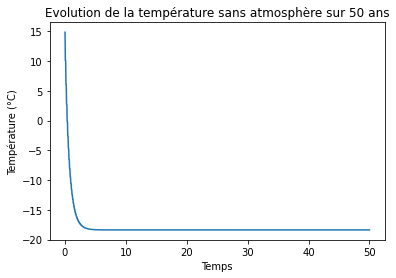

In [14]:
import numpy as np
from numpy import *
from copy import deepcopy
import math
from matplotlib import pyplot as plt

#Définition de notre pas de temps h 

Nbs=365.25*24*60*60 #Nombre de secondes en 1 année
Nbyear=50 #Nombre d'années de simulation
N=200 #Nombre de pas de temps
h=(Nbs*Nbyear)/N #Pas de temps pour euler implicite

## Initialisation de nos constantes

So=1365 #Constante solaire
C=2.08e8 #Capacité thermique de la Terre
α=0.3 #Albédo moyenne de la Terre
σ=5.67e-8 #Constante de Stephan
epsilon=e-28 #epsilon pour l'erreur
Nmax=1000 #Nombre d'itérations

#Définition de la fonction f obtenue après Euler implicite

def f(T,Tn):
    return -T -(h/C)*σ*T**4 + Tn + (h/C)*(1-α)*So/4

#Dérivée de notre fonction

def fprime(T):
    return -1 -4*(h/C)*σ*T**3

#Méthode de Newton 1d avec deux conditions initiales (une pour Ta+1 et une pour Ta) 

def Newton(f,fprime,T0,T1,eps,Nmax):
    T=T1
    k=0
    fT=f(T,T0)
    dfT=fprime(T)
    err=[] #Mise en place d'une erreur pour étudier la convergence
    err.append(abs(fT))
    vect_Temp_K=[] #Définition d'un vecteur de température afin de pouvoir tracer son évolution par la suite
    vect_Temp_K.append(T)
    
    while (abs(fT)>eps and k<Nmax):
        k=k+1
        T=T-fT/dfT #Chaque nouvelle température est définie suivant la méthode de Newton 1d
        fT=f(T,vect_Temp_K[k-1]) #Le calcul de f nécessite de prendre en compte la valeur précédente de T
        dfT=fprime(T)
        err.append(abs(fT))
        vect_Temp_K.append(T)
        
        
    return (vect_Temp_K,err)

# Définition de nos conditions initales T0 et T1

T0=288
T1=288

#On appelle notre méthode Newton

(vect_Temp_K,err)=Newton(f,fprime,T0,T1,epsilon,Nmax)

vect_Temp_D=[x-273.15 for x in vect_Temp_K] #Conversion en °C de nos température initialement en Kelvin

temps=linspace(0,50,1001) #On définit notre abscisse (évolution sur 50 ans)

#On trace ici l'évolution de la témperature sur ces 50 ans

plt.plot(temps,vect_Temp_D)
plt.title("Evolution de la température sans atmosphère sur 50 ans")
plt.xlabel("Temps")
plt.ylabel("Température (°C)")

print(" ")

print("Sans atmosphère, la température à la surface de la terre serait de ",round(vect_Temp_K[-1])," K, soit ",round(vect_Temp_D[-1])," °C")

print("Voici une modélisation de l'évolution de cette dernière : ")

print(" ")

## 3/

On remarque que la méthode de Newton converge vers une température d'environ 255K, ce qui correspond à -18.15°C.
Ce résultat n'est pas étonnant dans la mesure où sans atmosphère, tout le rayonnement solaire reçu serait directement renvoyé dans l'espace. La surface de la Terre ne pourrait donc pas se réchauffer et la température chuterait, jusqu'à environ -18 °C d'après les prévisions météo_France.

Ce modèle est bien evidemment très éloigné de la réalité dans la mesure où aucune couche d'atmosphère n'est présente, où l'effet de serre n'est donc pas représenté.

## 4/

Mettons le problème sous la forme $\frac{\mathrm{d}x(t)}{\mathrm{d}t} = f(t,x(t))$ 
  
  
On a :
$$C\frac{\mathrm{d}T}{\mathrm{d}t} = (1-\alpha)\frac{So}{4}-\sigma T^4$$  
  
On peut réécrire ce problème sous la forme :
$$\frac{\mathrm{d}T}{\mathrm{d}t} = \frac{1}{C}\Biggl((1-\alpha)\frac{So}{4}-\sigma T^4\Biggr)$$

On a donc : 
$$\left\{\begin{array}{lcc}
\frac{\mathrm{d}x(t)}{\mathrm{d}t} = f(t,x(t))\\
x(t_0)=x_0\\
\end{array}\right.$$ 

Avec la fonction $f$ : $\mathbf{R}$ x $\mathbf{R}$ $\to \mathbf{R}$ définie par :

$$ f(t,x) := \frac{1}{C}\Biggl((1-\alpha)\frac{So}{4}-\sigma x^4\Biggr) $$

Cette fonction est de classe $C^1$.  
  

En effet, $f$ est partiellement dérivable en $t$ et en $x$ et ces dérivées partielles sont continues.  
  

Cela signifie que $f$ est $C^1$ et :
$$Df(t,x(t))=\begin{bmatrix}\frac{\mathrm{d}f(t,x)}{\mathrm{d}t} & \frac{\mathrm{d}f(t,x)}{\mathrm{d}x}\\ \end{bmatrix} = \begin{bmatrix}0 & \frac{-4\sigma}{C}x^3 \\ \end{bmatrix}$$

$f$ est donc Localement Lipschitzienne par le théorème des Accroissements Finis et :  

$\forall \space t \in \mathbf{R}$ , $\forall \space (x,y) \in \mathbf{R}$ x $\mathbf{R}$ : 

$$| f(t,x)-f(t,y)| \le sup_{z \in ]x,y[}\frac{\mathrm{d}}{\mathrm{d}x}f(t,z)|x-y|$$  
  

Donc d'après le théorème de Cauchy-Lipschitz, il existe une unique solution maximale $(I,x)$ pour toute condition initiale $(t_0,x_0)$.



# Partie 2 : Bilan d’énergie avec atmosphère

## 1/

On cherche à résoudre :  
$$\left\{\begin{array}{lcc}
C_a\frac{\mathrm{d}T_a}{\mathrm{d}t} = -2\epsilon\sigma{T_a}^4+\epsilon\sigma{T_s}^4\\
C_s\frac{\mathrm{d}T_s}{\mathrm{d}t} = (1-\alpha)\frac{So}{4}+\epsilon\sigma{T_a}^4-\sigma{T_s}^4\\
\end{array}\right.$$

Par Euler implicite, on peut ramener ce problème à :
$$\left\{\begin{array}{lcc}
T_{a+1}=T_a+\frac{h}{C_a}(-2\epsilon\sigma{T_{a+1}}^4+\epsilon\sigma{T_s}^4)\\
T_{s+1}=T_s+\frac{h}{C_s}((1-\alpha)\frac{So}{4}+\epsilon\sigma{T_a}^4-\sigma{T_{s+1}}^4)\\
\end{array}\right.$$
    
Posons :
$$\left\{\begin{array}{lcc}
f_1(T) = -T_1+T_a+\frac{h}{C_a}(-2\epsilon\sigma{T_1}^4+\epsilon\sigma{T_s}^4)\\
f_2(T) = -T_2+T_s+\frac{h}{C_s}((1-\alpha)\frac{So}{4}+\epsilon\sigma{T_a}^4-\sigma{T_2}^4)\\
\end{array}\right.$$

Avec $T=\begin{pmatrix}
T_1\\
T_2\\
\end{pmatrix}$ et $F=\begin{pmatrix}
f_1\\
f_2\\
\end{pmatrix}$

On veut résoudre par la méthode de Newton :
    $$F(T) = 0$$
    
C'est à dire :
$$\left\{\begin{array}{lcc}
f_1(T) = 0\\
f_2(T) = 0\\
\end{array}\right.$$

  
## 2/


Dans un cas 'une couche d'atmosphère', la température à la surface de la Terre  serait donc de 284 K, soit  11 °C
Voici une modélisation de l'évolution de cette dernière : 
 


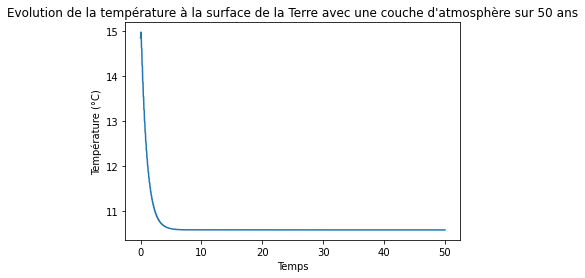

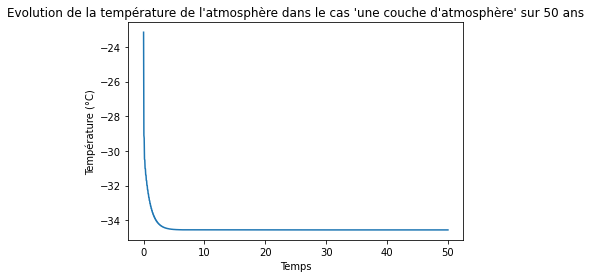

In [16]:
#Résolution avec NewtonNd

#On initialise deux nouvelles constantes

Ca=1e7 #Capacité thermique du Soleil
eps=0.7 #Emissivité de la couche d'atmosphère

#On passe maintenant en dimension 2
#On définit ici nos deux fonctions obtenues après Euler implicite

def fi(T,Ta,Ts):
    f=np.zeros((2,1))
    f[0]=-T[0]+Ta+(h/Ca)*(-2*eps*σ*T[0]**4+eps*σ*Ts**4)
    f[1]=-T[1]+Ts+(h/C)*((1-α)*So/4-σ*T[1]**4+eps*σ*Ta**4)
    return f

#On dérive ces dernières partiellement par rapport à Ta+1 et Ts+1 pour obtenir la jacobienne

def jac(T):
    Mat=np.zeros((2,2))
    Mat[0,0]=-1-(8*h/Ca)*eps*σ*T[0]**3
    Mat[0,1]=0
    Mat[1,0]=0
    Mat[1,1]=-1-(4*h/C)*σ*T[1]**3
    
    return Mat

#Méthode de Newton Nd avec deux vecteurs de conditions initiales (un pour Ta+1 et Ts+1 et un pour Ta et Ts) 

def NewtonNd(f,jac,T0,T1,eps,Nmax):
    T=T1
    k=0
    fT=f(T,T0[0],T0[1])
    dfT=jac(T)
    erreur=1
    Erreur=[]
    vect_Temp_surf_K=[] #Définition d'un vecteur pour stocker les différentes températures de surface
    vect_Temp_atmo_K=[] #Définition d'un vecteur pour stocker les différentes températures au niveau de la couche atmosphèrique
    vect_Temp_surf_K.append(T[1,0])
    vect_Temp_atmo_K.append(T[0,0])
    
    while (erreur>eps and k<Nmax) :
        k=k+1
        Tprec=deepcopy(T) #On réalise une copie de notre T 
        T=T-np.dot(np.linalg.inv(dfT),fT)  #Chaque nouvelle température est définie suivant la méthode de Newton Nd
        fT=f(T,Tprec[0],Tprec[1])  #Le calcul de f nécessite de prendre en compte la valeur précédente de T
        dfT=jac(T)
        erreur=np.linalg.norm(T-Tprec)/np.linalg.norm(T)
        Erreur.append(erreur)
        vect_Temp_surf_K.append(T[1,0])
        vect_Temp_atmo_K.append(T[0,0])
        
    return (vect_Temp_surf_K,vect_Temp_atmo_K,Erreur) 


# Définition de nos conditions initales T0 et T1

T0=np.array([[250],[288]])
T1=np.array([[250],[288]])

#On appelle notre méthode de Newton

(vect_Temp_surf_K,vect_Temp_atmo_K,Erreur) =NewtonNd(fi,jac,T0,T1,epsilon,Nmax)

#Conversion en °C de nos température initialement en Kelvin

vect_Temp_surf_D=[x-273.15 for x in vect_Temp_surf_K] 
vect_Temp_atmo_D=[x-273.15 for x in vect_Temp_atmo_K]

#Traçage de l'évolution de nos deux températures

plt.figure(1)
plt.plot(temps,vect_Temp_surf_D)

plt.title("Evolution de la température à la surface de la Terre avec une couche d'atmosphère sur 50 ans")
plt.xlabel("Temps")
plt.ylabel("Température (°C)")

plt.figure(2)
plt.plot(temps,vect_Temp_atmo_D)

plt.title("Evolution de la température de l'atmosphère dans le cas 'une couche d'atmosphère' sur 50 ans")
plt.xlabel("Temps")
plt.ylabel("Température (°C)")

print("Dans un cas 'une couche d'atmosphère', la température à la surface de la Terre  serait donc de",round(vect_Temp_surf_K[-1]),"K, soit ",round(vect_Temp_surf_D[-1]),"°C")

print("Voici une modélisation de l'évolution de cette dernière : ")

print(" ")



## 3/

Lorsque l'on prend en compte une couche d'atmosphère, on se retrouve avec des résultats plus proches de la réalité (Environ 12°C). Ceux-ci ne sont cependant pas optimaux puisque la température moyenne sur Terre est en réalité de 15°C.  
Dans ce modèle, la terre réémet l'intégralité du rayonnement solaire absorbé vers l'atmosphère sous forme de rayonnement infrarouge qui sera  en partie absorbé par les gaz à effet de serre. Cela contribue à réchauffer l'atmosphère et à refroidir la surface. Cette chaleur contenue par l'atmosphère est ensuite réémise en partie vers l'espace, et en partie vers la Terre. Ce qui s'oppose au refroidissement de la surface terrestre et augmente la température de cette dernière jusqu'à environ 12°C ici.

On remarque également que la température de l'atmosphère diminue jusqu'à atteindre environ -35°C. Lorsque que l'on monte en altitude, la pression atmosphérique diminue, l'air doit ainsi se dilater pour conserver le même volume. Il se refroidit ainsi. C'est une des lois fondamentales de la Thermodynamique.


## 4/
Mettons le problème sous la forme $\frac{\mathrm{d}x(t)}{\mathrm{d}t} = f(t,x(t))$ 
  
  
On a :
$$\left\{\begin{array}{lcc}
C_a\frac{\mathrm{d}T_a}{\mathrm{d}t} = -2\epsilon\sigma{T_a}^4+\epsilon\sigma{T_s}^4\\
C_s\frac{\mathrm{d}T_s}{\mathrm{d}t} = (1-\alpha)\frac{So}{4}+\epsilon\sigma{T_a}^4-\sigma{T_s}^4\\
\end{array}\right.$$
 
On peut réécrire ce problème sous la forme :
$$\left\{\begin{array}{lcc}
\frac{\mathrm{d}T_a}{\mathrm{d}t} = \frac{1}{C_a}(-2\epsilon\sigma{T_a}^4+\epsilon\sigma{T_s}^4)\\
\frac{\mathrm{d}T_s}{\mathrm{d}t} = \frac{1}{C_s}((1-\alpha)\frac{So}{4}+\epsilon\sigma{T_a}^4-\sigma{T_s}^4)\\
\end{array}\right.$$

On a donc : 
$$\left\{\begin{array}{lcc}
\frac{\mathrm{d}x(t)}{\mathrm{d}t} = f(t,x(t))\\
x(t_0)=x_0\\
\end{array}\right.$$ 

Avec :$f(t,x(t))=\Biggl[ \begin{array}{ccc}
f_1(t,x_1,x_2)\\
f_2(t,x_1,x_2)\\
\end{array} \Biggr]
=\Biggl[ \begin{array}{ccc}
\frac{1}{C_a}(-2\epsilon\sigma{x_1}^4+\epsilon\sigma{x_2}^4)\\
\frac{1}{C_s}((1-\alpha)\frac{So}{4}+\epsilon\sigma{x_1}^4-\sigma{x_2}^4)\\
\end{array} \Biggr]$


$f$ est partiellement dérivable en $t$ , en $x_1$ et en $x_2$. De plus ces dérivées partielles sont continues.  
  

Cela signifie que $f$ est $C^1$ et :  
 
$$Df(t,x(t))=\Biggl[ \begin{array}{ccc}
0 & \frac{-8}{C_a}(\epsilon\sigma{x_1}^3) & \frac{4}{C_a}(\epsilon\sigma{x_2}^3)\\
0 & \frac{4}{C_s}(\epsilon\sigma{x_1}^3) & \frac{-4}{C_s}(\sigma{x_2}^3)\\
\end{array} \Biggr]$$

$f$ est donc Localement Lipschitzienne par le théorème des Accroissements Finis et :  

$\forall \space t \in \mathbf{R}$ , $\forall \space (x,y) \in \mathbf{R}^2$ x $\mathbf{R}^2$ : 

$$| f(t,x)-f(t,y)| \le sup_{z \in ]x,y[}\frac{\mathrm{d}}{\mathrm{d}x}f(t,z)|x-y|$$  
  

Donc d'après le théorème de Cauchy-Lipschitz, il existe une unique solution maximale $(I,x)$ pour toute condition initiale $(t_0,x_0)$.




# Partie 3 : Pour aller plus loin

## 1/
$\begin{bmatrix}
-1 & \epsilon_1 & (1-\epsilon_1)\epsilon_2\\
\epsilon_1 & -2\epsilon_1 & \epsilon_1\epsilon_2\\
(1-\epsilon_1)\epsilon_2 & \epsilon_1\epsilon_2 & -2\epsilon_2\\
\end{bmatrix} \begin{bmatrix}
{T_s}^4\\
{T_1}^4\\
{T_2}^4\\
\end{bmatrix} = \frac{1}{\sigma} \begin{bmatrix}
H_S-\frac{So}{4}(1-\alpha)\\
H_L-H_S\\
-H_L\\
\end{bmatrix} $  

    
$\Leftarrow\Rightarrow  \left\{\begin{array}{lll}
-{T_s}^4+\epsilon_1{T_1}^4+(1-\epsilon_1)\epsilon_2{T_2}^4=\frac{1}{\sigma}(H_S-\frac{So}{4}(1-\alpha))\\
\epsilon_1{T_s}^4-2\epsilon_1{T_1}^4+\epsilon_1\epsilon_2{T_2}^4=\frac{1}{\sigma}(H_L-H_S)\\
(1-\epsilon_1)\epsilon_2{T_s}^4+\epsilon_1\epsilon_2{T_1}^4-2\epsilon_2{T_2}^4=\frac{-H_L}{\sigma}\\
\end{array}\right.$  
  
En multipliant par $\sigma$ on a :  
  
$\Leftarrow\Rightarrow \left\{\begin{array}{lll}
-\sigma{T_s}^4+\sigma\epsilon_1{T_1}^4+\sigma(1-\epsilon_1)\epsilon_2{T_2}^4=(H_S-\frac{So}{4}(1-\alpha))\\
\sigma\epsilon_1{T_s}^4-2\sigma\epsilon_1{T_1}^4+\sigma\epsilon_1\epsilon_2{T_2}^4=(H_L-H_S)\\
\sigma(1-\epsilon_1)\epsilon_2{T_s}^4+\sigma\epsilon_1\epsilon_2{T_1}^4-2\sigma\epsilon_2{T_2}^4=-H_L\\
\end{array}\right.$  

On retrouve finalement :  
  
$\Leftarrow\Rightarrow \left\{\begin{array}{lll}
\frac{So}{4}(1-\alpha)+\epsilon_1\sigma{T_1}^4+(1-\epsilon_1)\epsilon_2\sigma{T_2}^4=\sigma{T_s}^4+H_S\\
\epsilon_1\sigma{T_s}^4+\epsilon_1\epsilon_2\sigma{T_2}^4+H_S=2\epsilon_1\sigma{T_1}^4+H_L\\
(1-\epsilon_1)\epsilon_2\sigma{T_s}^4+\epsilon_1\epsilon_2\sigma{T_1}^4+H_L=2\sigma\epsilon_2{T_2}^4\\
\end{array}\right.$  



## 2/

In [17]:
import math

#Définition de l'algorithme de descente qui nous sera utile pour Gauss-Seidel

def Descente(A,b):
    n=np.size(b);
    x=np.zeros((n,1))
    x[0]=b[0]/A[0][0]
    for i in range(1,n):
        x[i]=(b[i]-np.dot(A[i][0:i],x[0:i]))/A[i][i]
    return(x)

#Définition de la méthode de Gauss-Seidel

def GaussSeidel(A,b,x0,eps,Nmax):
    k=0
    x=x0
    N=-triu(A,1)
    M=tril(A)
    normb=linalg.norm(b)
    residu=[] #On prend en compte nos erreurs tout au long de l'évolution
    residu.append(linalg.norm(A*x-b)/normb)
    while(linalg.norm(A*x-b)/normb>eps and k<Nmax):
        x=Descente(M,(np.dot(N,x)+b))  #M=D-E triangulaire inférieure
        residu.append(linalg.norm(A*x-b)/normb)
        k=k+1
    
    return (x,k,residu)

#Nous avons choisi d'utiliser Gauss-Seidel mais il est tout à fait possible d'utiliser Jacobi en utilisant cette méthode

def Jacobi(A,b,x0,eps,Nmax):
    x=x0
    k=0
    invD=np.diag(1./np.diag(A))
    MatN=-np.triu(A,1)-np.tril(A,-1)
    normb=np.linalg.norm(b)
    residu=[]
    residu.append(np.linalg.norm(A*x-b)/normb) #On garde l'erreur
    while(np.linalg.norm(A*x-b)/np.linalg.norm(b)>eps and k<Nmax):
        k=k+1
        x=np.dot(invD,(np.dot(MatN,x)+b))
        residu.append(np.linalg.norm(A*x-b)/normb)
    return (x,k,residu)

#Définition de nos constantes d'émissivité et de convection
#Le choix de ces différentes valeurs est décrit plus tard

eps1=np.array([0.1,0.7,0.9,0.1,0.5])
eps2=np.array([0.1,0.1,0.9,0.1,0.7])
Hs=np.array([0.1,5,5,180,10])
Hl=np.array([0.1,5,5,190,120])

#Création d'un vecteur pour stocker nos températures finales (surface, première et deuxième couche d'atmosphère) obtenues pour chaque cas

T=np.zeros((3,5))

for i in range(0,5):
    A=np.array([[-1,eps1[i],(1-eps1[i])*eps2[i]],[eps1[i],-2*eps1[i],eps1[i]*eps2[i]],[(1-eps1[i])*eps2[i],eps1[i]*eps2[i],-2*eps2[i]]])
    b=np.array([[(1/σ)*(Hs[i]-So*(1-α)/4)],[(1/σ)*(Hl[i]-Hs[i])],[-(1/σ)*Hl[i]]])

    #Définition de notre condition initiale
    
    T0=np.zeros((3,1))
    
    #On appelle notre méthode de Gauss-Seidel
    
    (Temp,k,residu) = GaussSeidel(A,b,T0,epsilon,Nmax)
    
    #On ajoute dans notre vecteur T les valeurs de températures en °C
    
    T[0,i]=math.sqrt(math.sqrt(Temp[0]))-273.15
    T[1,i]=math.sqrt(math.sqrt(Temp[1]))-273.15
    T[2,i]=math.sqrt(math.sqrt(Temp[2]))-273.15

print(" ")
print("Pour le modèle numéro 1 :\n -> eps1=0.1\n -> eps2=0.1\n -> Hs=0.1\n -> Hl=0.1\n Nous obtenons une température à la surface de la Terre de", round(T[0,0]),"°C")
print(" ")
print("Pour le modèle numéro 2 :\n -> eps1=0.7\n -> eps2=0.1\n -> Hs=5\n -> Hl=5\n Nous obtenons une température à la surface de la Terre de", round(T[0,1]),"°C")
print(" ")
print("Pour le modèle numéro 3 :\n -> eps1=0.9\n -> eps2=0.9\n -> Hs=5\n -> Hl=5\n Nous obtenons une température à la surface de la Terre de", round(T[0,2]),"°C")
print(" ")
print("Pour le modèle numéro 4 :\n -> eps1=0.1\n -> eps2=0.1\n -> Hs=180\n -> Hl=190\n Nous obtenons une température à la surface de la Terre de", round(T[0,3]),"°C")
print(" ")
print("Pour le modèle numéro 5 :\n -> eps1=0.5\n -> eps2=0.7\n -> Hs=10\n -> Hl=120\n Nous obtenons une température à la surface de la Terre de", round(T[0,4]),"°C")

 
Pour le modèle numéro 1 :
 -> eps1=0.1
 -> eps2=0.1
 -> Hs=0.1
 -> Hl=0.1
 Nous obtenons une température à la surface de la Terre de -12 °C
 
Pour le modèle numéro 2 :
 -> eps1=0.7
 -> eps2=0.1
 -> Hs=5
 -> Hl=5
 Nous obtenons une température à la surface de la Terre de 12 °C
 
Pour le modèle numéro 3 :
 -> eps1=0.9
 -> eps2=0.9
 -> Hs=5
 -> Hl=5
 Nous obtenons une température à la surface de la Terre de 50 °C
 
Pour le modèle numéro 4 :
 -> eps1=0.1
 -> eps2=0.1
 -> Hs=180
 -> Hl=190
 Nous obtenons une température à la surface de la Terre de -43 °C
 
Pour le modèle numéro 5 :
 -> eps1=0.5
 -> eps2=0.7
 -> Hs=10
 -> Hl=120
 Nous obtenons une température à la surface de la Terre de 14 °C


## 2-3/ Discussion :

### Tests pertinents :

Dans cette partie, nous considérons deux couches d'atmosphère et une seule couche de surface. Chaque couche d'atmosphère est considérée comme un corps gris, et émet alors dans toutes les directions. Ici, nous considérons que la moitié de l'énergie réémise part vers l'espace et l'autre moitié vers la Terre.  
  
  
De plus, la surface chaude ne transfère plus uniquement la chaleur par rayonnement infrarouge mais également par flux de chaleur convectif ascendant.  
L'idée, ici, est de savoir comment évolue la température à la surface de la Terre en fonction des valeurs des émissivités de nos deux couches d'atmosphère, mais également en fonction des valeurs des flux convectifs Hl (de la surface vers la basse atmosphère) et Hs (de la basse vers la haute atmosphère).  

Pour cela, nous avons choisi différentes valeurs pertinentes de eps1, eps2, hl et hs :
    
1.$\space$ Nous avons tout d'abord donné des valeurs très faibles à ces 4 composantes, de sorte que ces dernières soient négligeables et qu'on se retrouve dans un modèle sans atmosphère. Ainsi le rayonnement émis par le soleil est transféré par la surface de la Terre sous forme de rayonnement infrarouge uniquement. On se retrouve donc avec une température d'environ -11°C, ce qui coïncide avec les -18°C que nous avions obtenu dans la partie 1.
    
2.$\space$ Nous avons ensuite augmenté la valeur de eps1 (émissivité de la basse atmosphère) afin de retrouver un schéma avec une seule couche d'atmosphère. En mettant eps1 à 0.7, on obtient une température à la surface de la Terre de 12°C, ce qui correspond aux 11°C obtenus dans la partie 2.  
La chaleur augmente (par rapport au premier cas) car l'atmosphère va renvoyer une partie de l'energie qu'elle reçoit vers la Terre.
    
3.$\space$ Dans le troisième modéle, nous avons décidé de grandement augmenter nos valeurs de nos deux émissivités, tout en laissant nos flux de chaleur convectifs assez faibles. Dans la mesure où une grande partie de l'énergie perdue par la Terre sera retransmise par les deux atmosphères vers cette dernière, nous nous attendions à obtenir une valeur de température de surface très élévée. Ce résultat s'est confirmé puisque nous obtenons 50°C.
    
4.$\space$ Dans le même procédé, nous avons cherché à obtenir une température très faible. Nous avons donc réduit nos émissivités à 0.1 et augmenté nos flux de chaleur convectifs de manière conséquente. La Terre transfère donc son énergie par rayonnement infrarouge et par flux de chaleur convectifs ascendant, énergie partant directement dans l'espace (en raison des émissivités très faibles). Nous avons donc obtenu, de manière logique, une température très faible de l'ordre de -43°C.
    
5.$\space$ Enfin pour mettre en place un modèle un peu plus réaliste, nous avons utilisé les valeurs présentes dans l'énoncé du projet. Nous avons donc des valeurs d'émissivité moyennes, de même pour les flux de chaleur convectifs (en particulier Hl). Ce rapport nous permet d'obtenir une température de surface de 14°C ce qui correspond bien à la température moyenne de la Terre actuelle qui est d'environ 15°C.
    
Nous pouvons noter que pour les modèles 3 et 4, les conditions ne seraient pas favorables à la vie humaine sur Terre, dans la mesure où les températures seraient trop extrêmes.
    
    
### Pistes d'amélioration :


Ce dernier modèle est bien évidemment plus réaliste que les deux premiers mais il est tout à fait possible de l'améliorer.  
  
En effet, dans la réalité, l'atmosphère se divise en 5 couches et non 2, il aurait alors fallu réaliser des tests avec plus de couches d'atmosphère.  
  
De plus, dans ce modéle, nous avons fait l'hypothèse que l'atmosphère était parfaitement transparente au rayonnement solaire, ce qui n'est pas le cas dans la réalité : environ 23% du rayonnement solaire est réfléchi par l'atmosphère. 
  
Cette énergie réfléchie donnera lieu à de nouveaux échanges entre les différentes couches de l'atmopshère et entrainera par conséquent de nouvelles variations de températures.  
  
L'évaporation, la condensation, les turbulences, sont ici répresentés comme des flux de chaleur convectifs, or ces transformations/phénomènes ont leurs propriétés propres.

## Conclusion :
  
Au vu des résultats obtenus pour ces différents modèles, nous remarquons que l'effet de serre joue un rôle très important dans la régulation de la température, et donc est nécessaire à l'évolution de la vie sur Terre. Sans elle (modèle 1) la température à la surface de la Terre serait d'environ -18°C, et à cette température, la Terre ne deviendrait qu'une boule de glace où la vie ne serait pas possible, car il n'y aurait pas d'eau liquide.
Heureusement, des conditions optimales (conditions vers lesquelles se rapproche le modèle 3 même s'il en reste assez éloigné) font que cette dernière tourne ajourd'hui autour des 15°C.

Cependant, aujourd'hui, les activités humaines ont contribué à émettre un grand nombre de gaz à effet de serre, augmentant ainsi leur concentration dans l'atmosphère. En raison de cela, la température moyenne devrait augmenter de 2°C d'ici 2050. C'est ce qu'on appelle le réchauffement climatique. Cette augmentation de la température sera responsable d'une hausse du niveau de la mer, entrainant la disparition de vastes portions de pays. De plus, cette hausse des températures, contribuera à la prolifération des insectes propageant des maladies infectieuses. 

La question que nous pouvons nous poser ici est : Est-il encore possible d'empêcher cette augmentation, ou est-il déjà trop tard ?
   
  